In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline


In [2]:
# Importing the dataset
c_data = pd.read_csv("https://raw.githubusercontent.com/suyashi29/python-su/master/data/Customer%20Segmentation.csv")
c_data.head(2)

,INCOME,SPEND
0,233,150
1,250,187


In [3]:
#descriptive statistics of the dataset
c_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,309.0,243.977346,49.069618,126.0,209.0,240.0,274.0,417.0
SPEND,309.0,148.883495,23.693374,71.0,132.0,152.0,166.0,202.0


- The dataset consists of 303 rows. The mean annual income is 245000 and the mean annual spend is 149000.

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Income / spend')

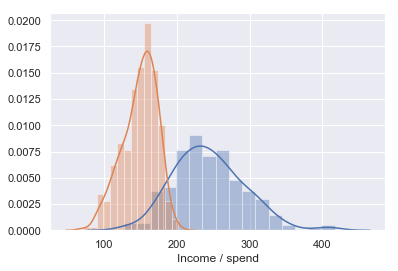

In [4]:
#Visualizing the data - displot
plot_income = sns.distplot(c_data["INCOME"])
plot_spend = sns.distplot(c_data["SPEND"])
plt.xlabel('Income / spend')

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(0, 420)]

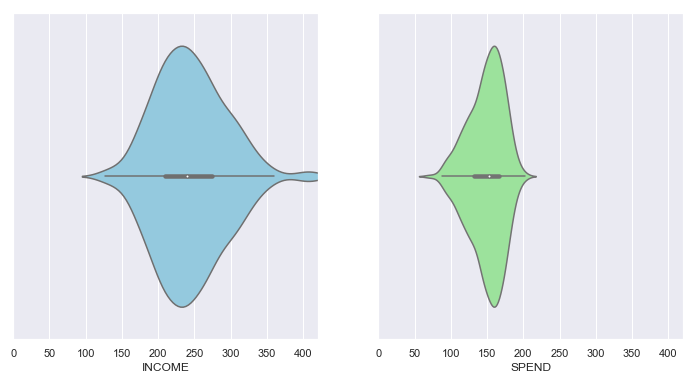

In [5]:
#Violin plot of Income and Spend
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=c_data, x='INCOME', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=c_data, x='SPEND',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

## Why Clustering?

- The mathematics behind clustering, in very simple terms involves minimizing the sum of square of distances between the cluster centroid and its associated data points
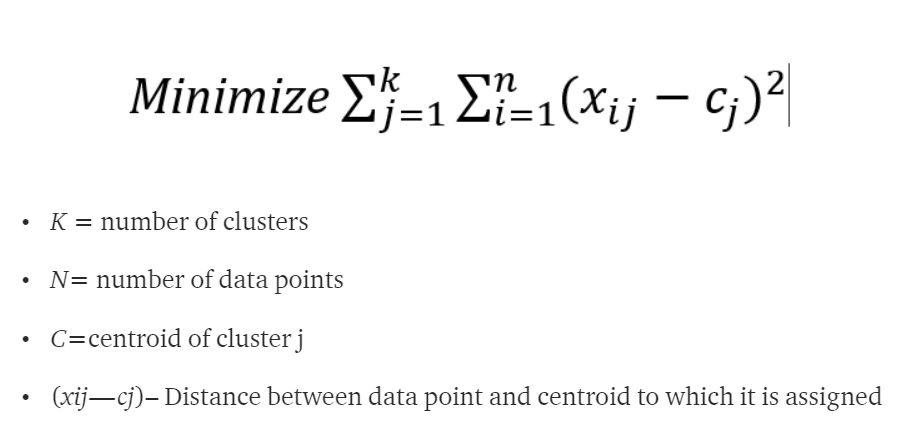



In [16]:
X= c_data.iloc[:, [0,1]].values

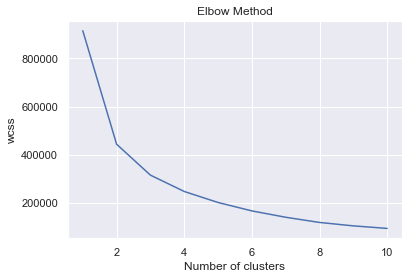

In [36]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [18]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
# Centroid values
C = kmeansmodel.cluster_centers_
print(C)

[[266.72093023 138.88372093]
 [186.0625     132.421875  ]
 [224.40909091 164.65454545]
 [323.63265306 152.53061224]]


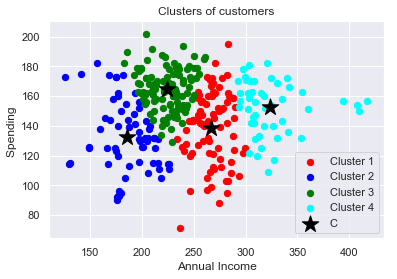

In [31]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 40, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 40, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 40, c = 'cyan', label = 'Cluster 4')
plt.scatter(C[:, 0],C[:, 1], s = 300, c = 'black', label = 'C',marker="*")
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending ')
plt.legend()
plt.show()

### Insights
The plot shows the distribution of the 4 clusters. We could interpret them as the following customer segments:

- Cluster 1: Customers with medium annual income and low annual spend
- Cluster 2: Customers with high annual income and medium to high annual spend
- Cluster 3: Customers with low annual income
- Cluster 4: Customers with medium annual income but high annual spend

In [32]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
# Centroid values
C = kmeansmodel.cluster_centers_
print(C)

[[191.02       122.44      ]
 [321.34615385 153.23076923]
 [248.75700935 159.28971963]
 [269.94444444 115.61111111]
 [199.890625   167.328125  ]]


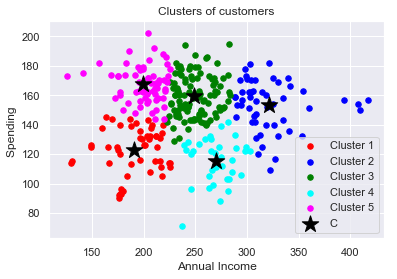

In [34]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Cluster 5')
plt.scatter(C[:, 0],C[:, 1], s = 300, c = 'black', label = 'C',marker="*")
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending ')
plt.legend()
plt.show()

### Insights :
- Cluster 1: Medium income, low annual spend
- Cluster 2: Low income, low annual spend
- Cluster 3: High income, high annual spend
- Cluster 4: Low income, high annual spend
- Cluster 5: Medium income, low annual spend
